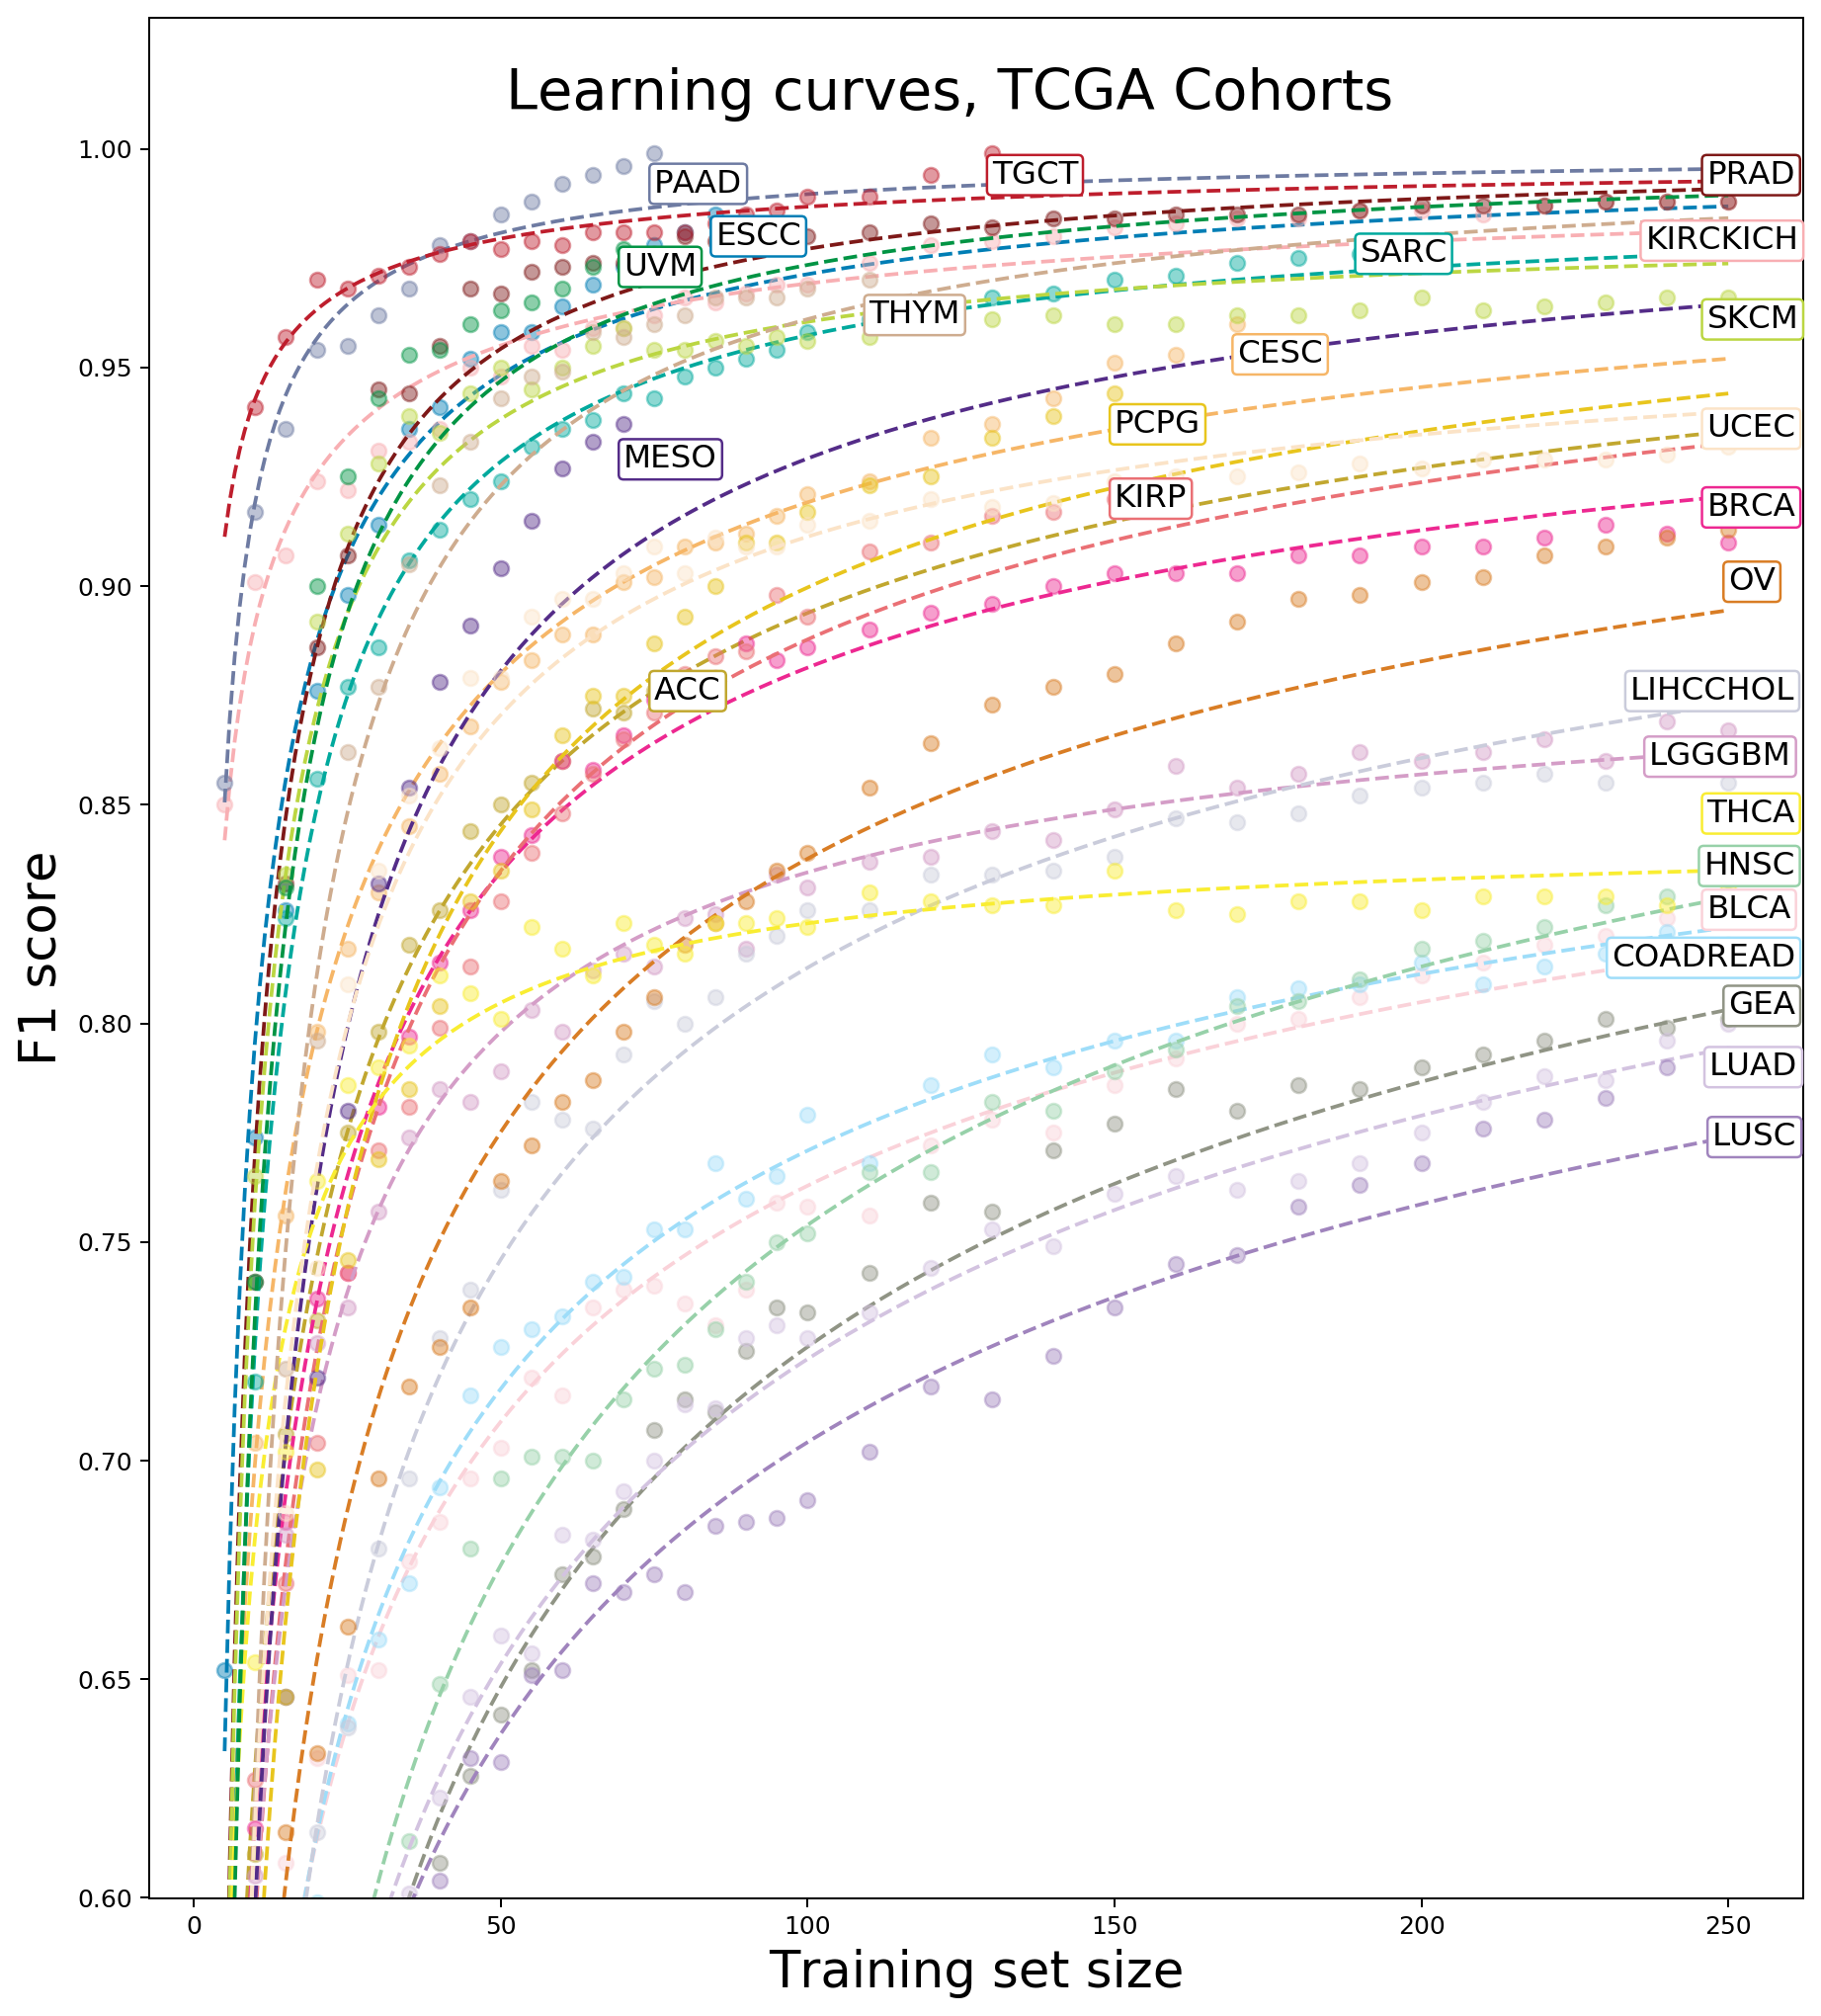

In [7]:
# Panel 7B Main plot, cropped, Labels horizontal
import pandas as pd
import json
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from statistics import mean
colors = pd.read_csv('TCGA_colors_n26_20210228.csv', sep = ',', names = ['Cancer', 'Hexi'])
fig, ax = plt.subplots(figsize = (12,14), dpi = 180)

response_DF = pd.read_csv('sample_response_DF_20210805.tsv', sep = '\t')

def Y_acc(x, a, b, c): # x is sample size
    Y_acc = (1-a)-b*x**c
    return Y_acc

lower = [0,-1000,-1]
upper = [.5,1000,0]


# To do: reset offsets for cropped version
offset = [0,    # ACC
          -.002,    # BLCA
          .008,    # BRCA
          -.007,    # CESC
          -.003,    # COADREAD
          -.005,    # ESCC
          .003,    # GEA
          .003,    # HNSC
          -.009,    # KIRCKICH
          -.0,    # 
          -.006,      # LGGGBM
          .021,      # LIHCCHOL
          -.01,      # LUAD
          -.019,     # LUSC
          -.008,
          -.012, # OV
          -.007,    # PAAD
          -.007,    # PCPG
          .006, # PRAD
          0,
          -.005, # SKCM
          -.005, # TGCT
          .017,  # THCA
          -.008,
          .004, # UCEC
          -.004 ] # UVM

offset_horz = [0,    # ACC
          -3.5,    # BLCA
          -3.5,    # BRCA
          0,    # 
          -19,    # COADREAD
          0,    # ESCC
          .00,    # GEA
          -4,    # HNSC
          -13.5,    # KIRCKICH
          -.0,    # 
          -12.9,      # LGGGBM
          -16,      # LIHCCHOL
          -3.1,      # LUAD
          -2.6,     # LUSC
          -.00,
          -.0, # OV
          0,
          0,
          -3.5, # PRAD
          0,
          -3.5, # SKCM
          -.00, # TGCT
          -3.5,  # THCA
          -.00,
          -3.5, # UCEC
          0]

for idx, cohort in enumerate(response_DF.Cohort):
#     print(idx)
#     break
    accuracy_response_dct = {
        int(k):[i for i in v] for k,v in json.loads(
        response_DF.iloc[idx,1]).items()}
    
    accuracy_response = sorted(accuracy_response_dct.items())
    
    full_samples = []
    full_scores = []
    for i in list(range(0,len(accuracy_response))):
        score = mean(accuracy_response[i][1])
        mean_temp = round(score, 3)
        full_scores.append(mean_temp)
        full_samples.append(accuracy_response[i][0])
#     break
    f, _ = curve_fit(Y_acc, full_samples, full_scores, bounds=[lower,upper])
    color_shard = colors[colors.Cancer == cohort]
    colr = color_shard.iloc[0,1]
    ax.plot(full_samples, full_scores, 'o', c = colr, alpha = .45)
    ax.text(full_samples[-1] + offset_horz[idx],
            full_scores[-1] + offset[idx],
            cohort, fontsize = 13,va='center',
           bbox = dict(facecolor='white', edgecolor=colr, boxstyle='round,pad=0.15'))
    x = np.linspace(5, 250, 300)
    y = Y_acc(x, *f)  
    ax.plot(x, y, '--', color=colr)
fig.suptitle('Learning curves, TCGA Cohorts', y = .86,fontsize = 23)
ax.set_xlabel('Training set size', fontsize = 20.5)
ax.set_ylabel('F1 score', fontsize = 20.5)
plt.ylim(.6,1.03)
plt.savefig('./B/B_main.png',dpi=180)
plt.show()

In [8]:
# Begin plot on single 250 sample cohort and prediction cohort
# Panel 7C, lower left
# Import packages, read files, set bounds and inverse power function

import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from scipy.optimize import curve_fit
import numpy as np # need for linspace in plot
from statistics import mean
import statistics
import time
import math
import json
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
import matplotlib.lines as lines
from sklearn.linear_model import LinearRegression
pd.options.display.max_rows = 500

colors = pd.read_csv('TMP_cohort_colors_n26_20210228.csv',
                     sep = ',', skiprows = 1, names = ['Cohort', 'Hexi'])

sample_response_DF = pd.read_csv('sample_response_DF_20210805.tsv',
                                          sep = '\t')

lower = [0,-1000,-1]
upper = [.5,1000,0]

def Y_acc(x, a, b, c): # x is sample size
    Y_acc = (1-a)-b*x**c
    return Y_acc

In [118]:
sample_response_DF.head()

,Cohort,Sample_size_100_accuracies
0,ACC,"{""5"": [0.34285714285714286, 0.6901098901098901..."
1,BLCA,"{""5"": [0.0, 0.8, 0.901010101010101, 0.35606060..."
2,BRCA,"{""5"": [0.4499999999999999, 0.8967032967032967,..."
3,CESC,"{""5"": [0.6329966329966329, 1.0, 0.52, 0.355555..."
4,COADREAD,"{""15"": [0.30416666666666664, 0.713043478260869..."


In [22]:
full_response = [('BLCA', 1),
 ('BRCA', 2),
 ('COADREAD', 4),
 ('GEA', 6),
 ('HNSC', 7),
 ('KIRCKICH', 8),
 ('LGGGBM', 10),
 ('LIHCCHOL', 11),
 ('LUAD', 12),
 ('LUSC', 13),
 ('OV', 15),
 ('PRAD', 18),
 ('SKCM', 20),
 ('THCA', 22),
 ('UCEC', 24)]

In [157]:
full_response_point_5 = [('BLCA', 1), # run in two chunks to not max memory
 ('BRCA', 2),
 ('COADREAD', 4),
 ('GEA', 6),
 ('HNSC', 7),
 ('KIRCKICH', 8),
 ('LGGGBM', 10)]

In [159]:
full_response_1 = [('LIHCCHOL', 11),
 ('LUAD', 12),
 ('LUSC', 13),
 ('OV', 15),
 ('PRAD', 18),
 ('SKCM', 20),
 ('THCA', 22),
 ('UCEC', 24)]

In [10]:
full_responseX = [('BLCA', 1)]

In [149]:
full_responseX = [('BRCA', 2)] # Toggle on single cohort

In [59]:
full_responseX = [('LGGGBM',10)]

In [109]:
full_responseX = [('LUAD',12)]

In [112]:
full_responseX = [('COADREAD',4)]

In [135]:
full_responseX

[('BRCA', 2)]

('BLCA', 1)
('BRCA', 2)
('COADREAD', 4)
('GEA', 6)
('HNSC', 7)
('KIRCKICH', 8)
('LGGGBM', 10)
done


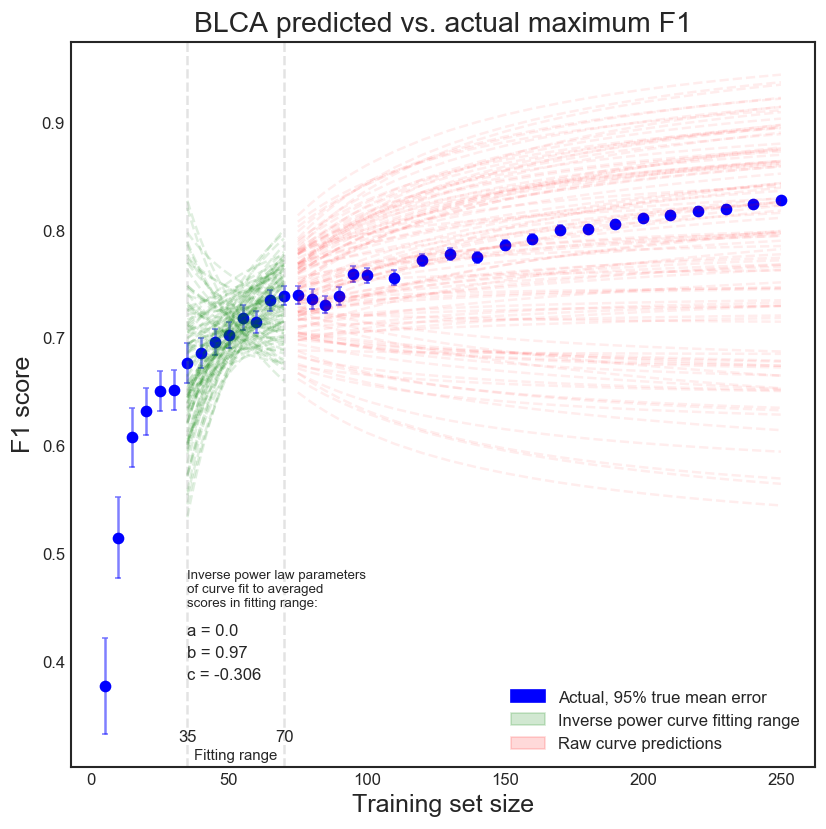

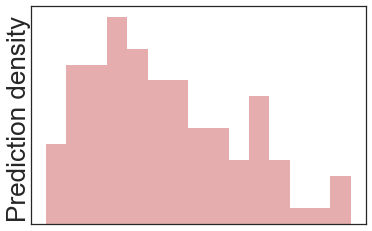

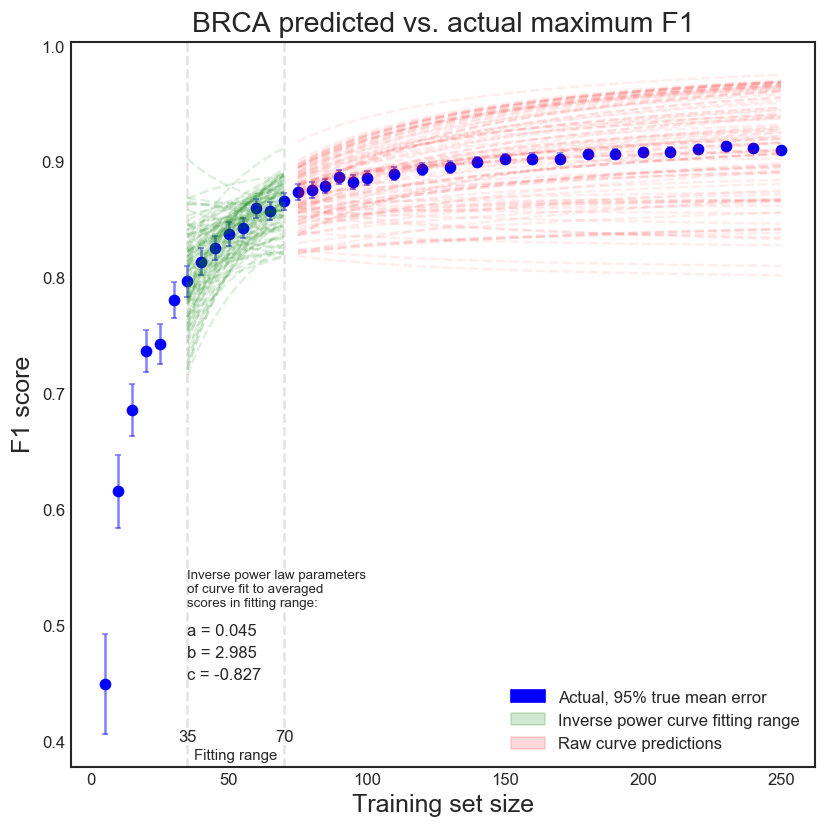

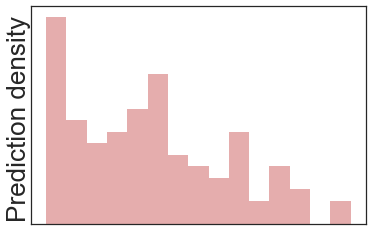

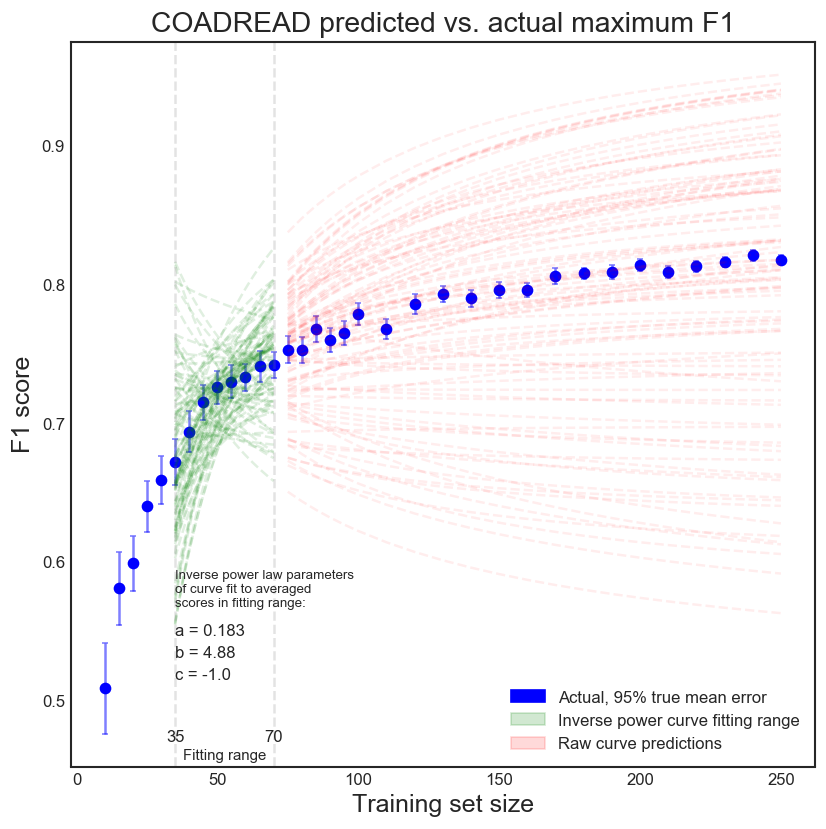

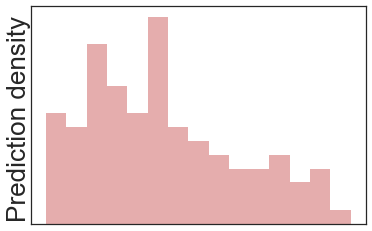

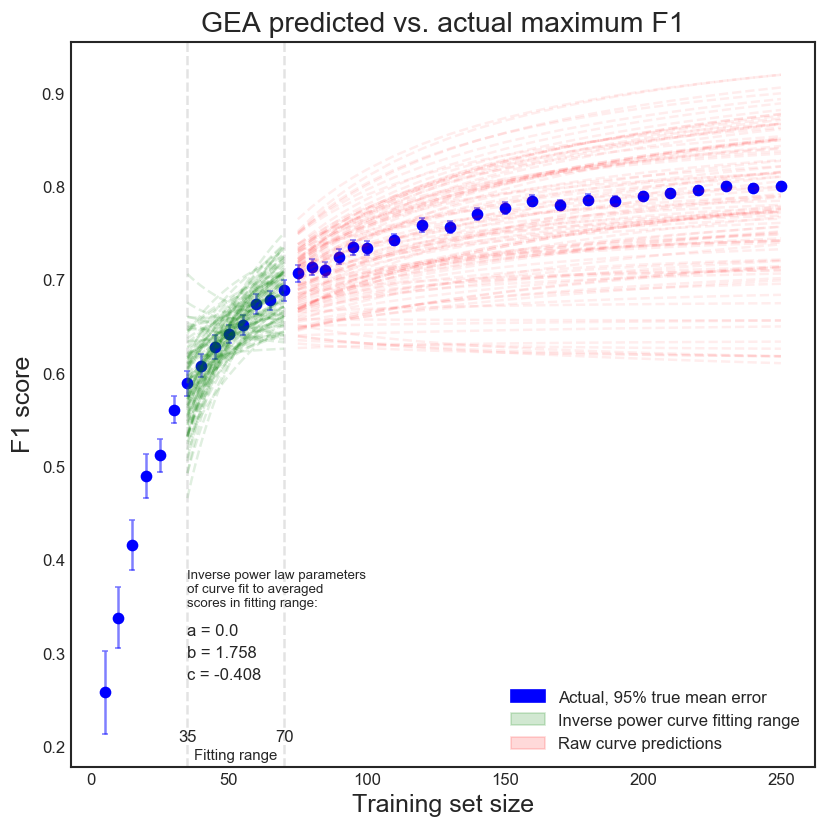

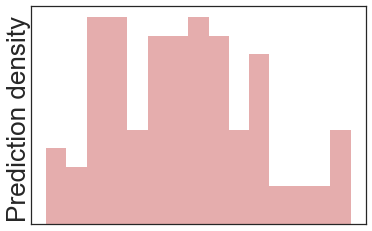

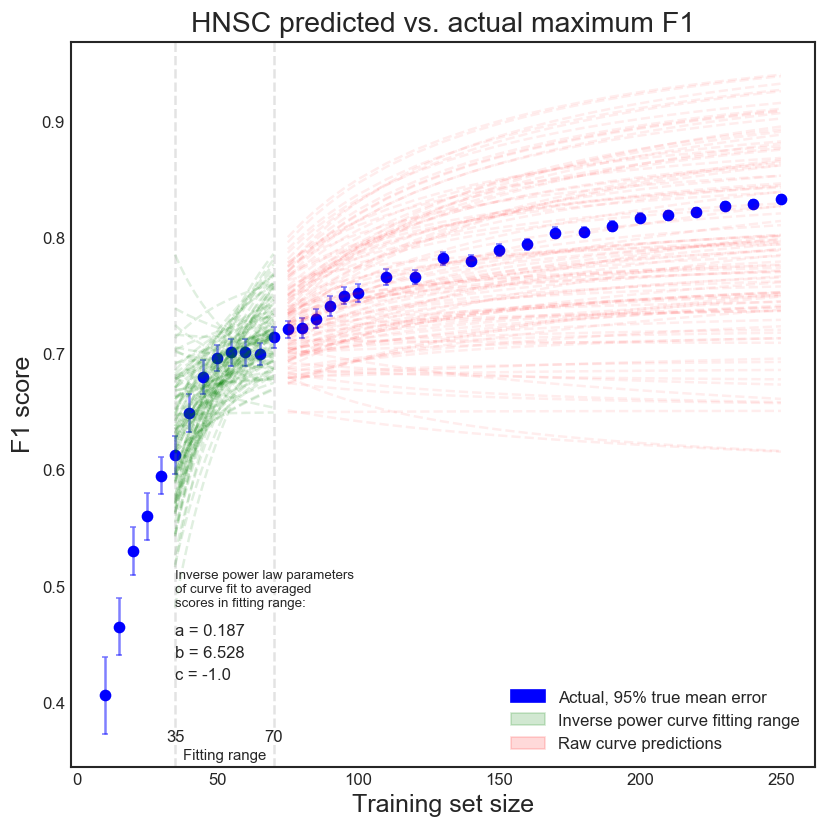

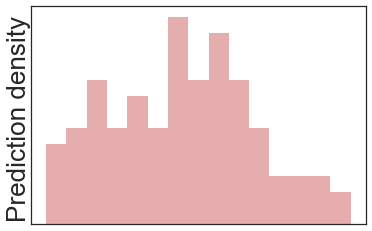

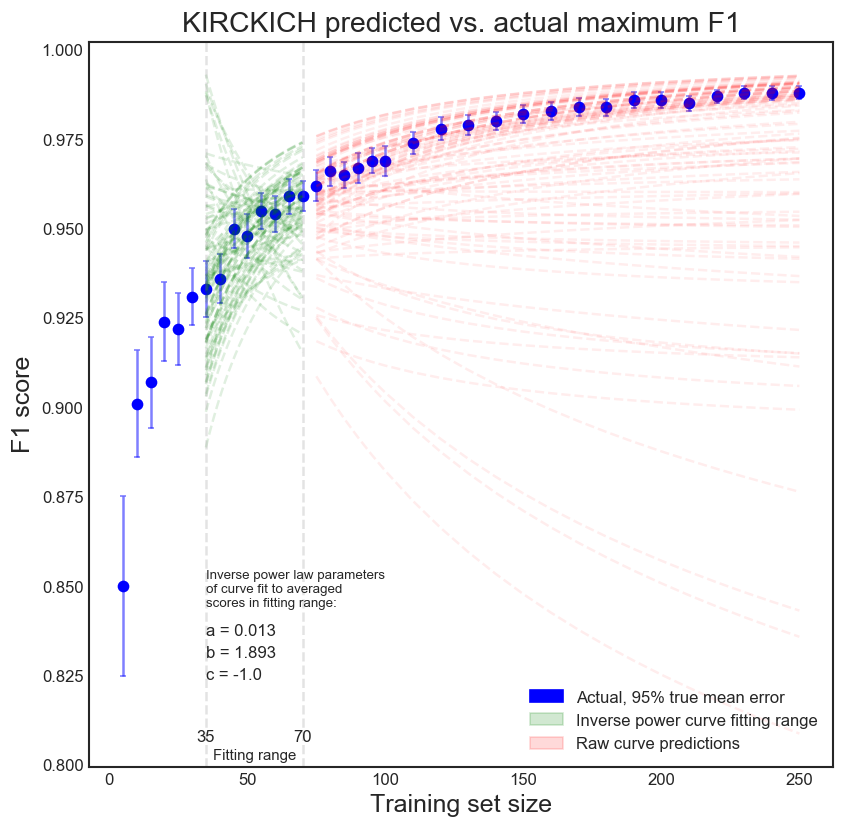

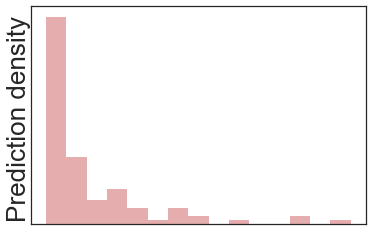

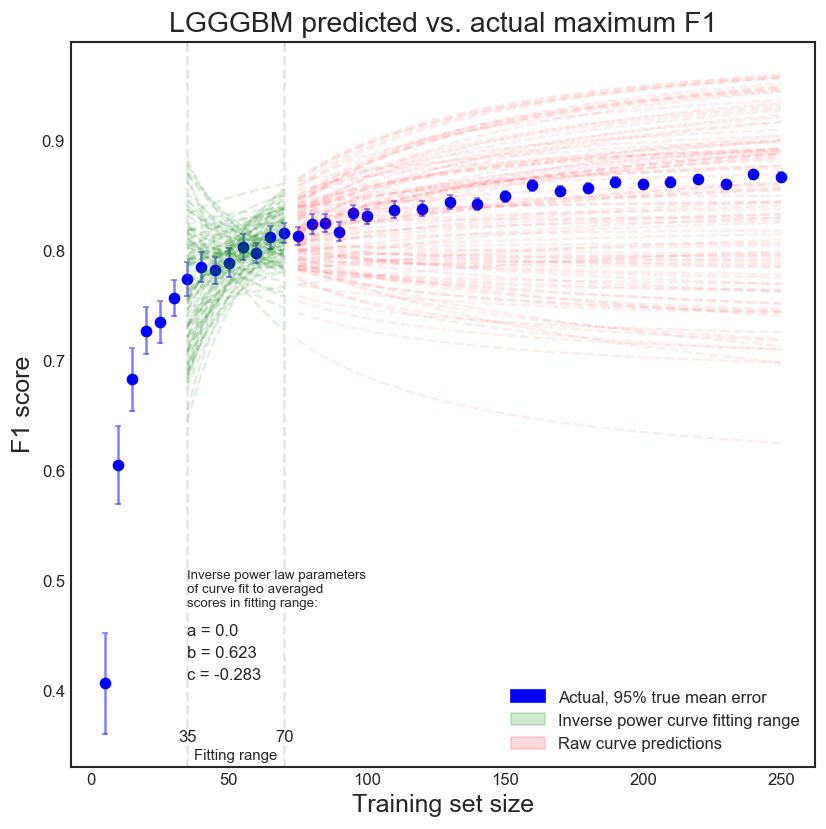

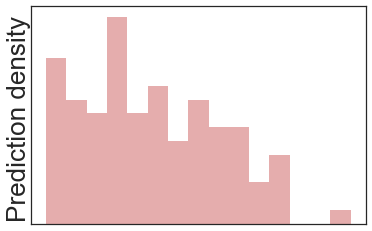

In [162]:
# Full cohorts
for idx, cohort_tuple in enumerate(full_response_point_5): # list of cohorts and indices <--- TOGGLE object, COAD, LUAD
    
    print(cohort_tuple)
    cohort = cohort_tuple[0]
    cohort_index = cohort_tuple[1]

    accuracy_response_dct = {
    int(k):[i for i in v] for k,v in json.loads(
        sample_response_DF.iloc[cohort_index,1]).items()} # sample_response_DF_20210805.tsv
    
    accuracy_response = sorted(accuracy_response_dct.items())

    # List of full sample sizes and scores
    full_samples = []
    full_scores = []
    for i in list(range(0,len(accuracy_response))):
        score = mean(accuracy_response[i][1])
        mean_temp = round(score, 3)
        full_scores.append(mean_temp)
        full_samples.append(accuracy_response[i][0])

    # Plot learning curve
    fig, ax = plt.subplots(figsize = (8,8), dpi = 120)
    ax.scatter(full_samples, full_scores, color = 'blue')
    
    # Set fitting region by index
    if cohort not in ['COADREAD', 'HNSC']:
        sample_max = 14 #14 is default, max
        sample_min = 6 #5 is default # BRCA 14,4 and 13,4 is good, 14,7 too
    else:
        sample_max = 13 # 13 is default, max
        sample_min = 5  # 4 is dfault      

    fitting_samples = []
    fitting_scores = []
    fitting_scores_ave = []
    for i in list(range(sample_min, sample_max)): # Iterate fitting region
        score_block = accuracy_response[i][1]
        sample_size = accuracy_response[i][0]
        fitting_samples.append(sample_size)
        fitting_scores.append(score_block) # raw scores for this step
        fitting_scores_ave.append(mean(score_block))

    actual_scores = []
    prediction_samples = [] # * Using this
    for j in list(range(sample_max,len(accuracy_response))):
#         actual_scores.append(accuracy_response[j][1])
        prediction_samples.append(accuracy_response[j][0])

    actual_full_scores = []
    for j in list(range(0,len(accuracy_response))):
        actual_full_scores.append(accuracy_response[j][1])
    
    n1 = 100
    CI_range = []
    for k, score_set in enumerate(actual_full_scores):
#         xbar = round(mean(score_set), 3) # yes
        z = 1.96 # 95%
        s = statistics.stdev(score_set) # Yes, all the scores corresponding to this step
 
        CI_range.append(z * (s/math.sqrt(n1)))
    # Errorbars for sampling error, Keep, bring to top
    ax.errorbar(full_samples,
                full_scores,
                yerr = CI_range, color = 'blue', alpha = .5, fmt=' ',
                capsize = 2)
    
    slope = ()
    front_end_mean_params, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 fitting_scores_ave,
                                    bounds=[lower,upper])
    x_fit_slope = np.linspace(fitting_samples[0], fitting_samples[-1], len(fitting_samples))
    y_fit_slope = Y_acc(x_fit_slope, *front_end_mean_params)
#     ax.scatter(x_fit_slope, y_fit_slope, s=60, facecolors='none', edgecolors='black')
    
    parameter_dict[cohort_index] = front_end_mean_params # add to parameter dict
    
    slope_ave = (y_fit_slope[-1] - y_fit_slope[0])/(x_fit_slope[-1] - x_fit_slope[0])
    slope_list.append(slope_ave)
    
    intercept_ave = y_fit_slope[0] - slope_ave * x_fit_slope[0]
    intercept_list.append(intercept_ave)
    
#     fit_list.append(y_fit) # ***** 
    
    # Grey dot projection, based on average curve
    project = Y_acc(prediction_samples, *front_end_mean_params)
#    ax.scatter(prediction_samples, project, s=50, facecolors='none', edgecolors='grey') ## <--- Grey dots off
    
    # Grey dot confidence interval - only one sample for n
    grey_up = []
    grey_low = []
    n=1

    # Set up for prediction              *********************** 100 resamplings, build orange bar
    front_end_parameters = {}
    y_predictions = []         #                             <---------- y_predictions
    y_predictions_srs = pd.Series(dtype = 'float64')
    y_std = []
    slopes_100 = []
    intercepts_100 = []
    y_final_100 = []
    orange_vs_grey = []
    down_curves = []
    down_curves_srs = pd.Series(dtype = 'float64')
    for resampling_idx in list(range(0,100)):

        scores_temp = [] # 100 scores for each sample size on restricted front-end portion of curve

        for tuple_n in accuracy_response[sample_min:sample_max]:
            scores_temp.append(tuple_n[1][resampling_idx])

        front_end_param_set_n, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 scores_temp,
                                    bounds=[lower,upper])
        front_end_parameters[resampling_idx] = front_end_param_set_n

        # Now, plot all 100 front-end fitting curves and compare to actual 
        x_fit = np.linspace(fitting_samples[0], fitting_samples[-1], 50)
        y_fit = Y_acc(x_fit, *front_end_param_set_n)
        ax.plot(x_fit, y_fit, '--', color = 'green', alpha = .12)
        
        slope = (y_fit[-1] - y_fit[0])/(x_fit[-1] - x_fit[0])
        slopes_100.append(slope)
        intercept = y_fit[0] - slope * x_fit[0]
        intercepts_100.append(intercept)
        
        y_predict = Y_acc(prediction_samples, *front_end_param_set_n) # Fit to each param set
        ax.plot(prediction_samples, y_predict, '--', color = 'red', alpha = .07)
        y_predictions.append(y_predict)
        
        y_predictions_srs[str(resampling_idx)] = y_predict

        y_final_100.append(y_predict[-1])
        
        diff = y_predict[0]-y_predict[-1]
        down_curves.append(diff)
    
    slopeDF_100 = pd.DataFrame()
    slopeDF_100['Intercept'] = intercepts_100
    slopeDF_100['Slope'] = slopes_100

    # Label plot, keep
    plt.title(cohort +
        ' predicted vs. actual maximum F1',
        fontsize = 17)
    ax.set_xlabel('Training set size', fontsize = 15)
    ax.set_ylabel('F1 score', fontsize = 15)
    
    # Tune placement of labels, keep
    xfit1 = fitting_samples[0]
    xfit2 = fitting_samples[-1]
    ylims = ax.get_ylim()
    y_rng = ylims[1] - ylims[0]              # Y range, defined from limits
    
    # Fitting range labels
    plt.text(xfit1, ylims[0]+.035 * y_rng,
             str(xfit1), ha = 'center')    
    plt.text((xfit1+xfit2)/2, ylims[0]+.01 * y_rng,
             'Fitting range', ha = 'center', fontsize = 9)
    plt.text(xfit2, ylims[0]+.035 * y_rng,
             str(xfit2), ha = 'center')
    
    # Add vertical dashes for fitting window, keep
    ax.add_artist(lines.Line2D([xfit1, xfit1],
                              [ylims[0], ylims[1]],
                              color = 'grey', linestyle='dashed', alpha = .22))
    ax.add_artist(lines.Line2D([xfit2, xfit2],
                              [ylims[0], ylims[1]],
                              color = 'grey', linestyle='dashed', alpha = .22))
    
    patch_1 = mpatches.Patch(color='blue', label='Actual, 95% true mean error') # delete
    patch_2 = mpatches.Patch(color='green', alpha = .18, label='Inverse power curve fitting range')
    patch_3 = mpatches.Patch(color='red', alpha = .15, label='Raw curve predictions')
    plt.legend(handles=[patch_1, patch_2, patch_3], loc = 4)
    
    # Plot parameters
    plt.text(xfit1, ylims[0]+.22 * y_rng, 'Inverse power law parameters\nof curve fit to averaged\nscores in fitting range:',
            fontsize = 8)
    plt.text(xfit1, ylims[0]+.18 * y_rng, 'a = '+str(round(front_end_mean_params[0],3)))
    plt.text(xfit1, ylims[0]+.15 * y_rng, 'b = '+str(round(front_end_mean_params[1],3)))         
    plt.text(xfit1, ylims[0]+.12 * y_rng, 'c = '+str(round(front_end_mean_params[2],3)))

    # Save figure, keep
    plt.savefig('./C/'+ cohort + '.'+
                str(fitting_samples[0])+'.'+
                str(fitting_samples[-1])+
                '.png') # end devel mode
    
    final_vals = []
    for i in y_predictions:
        final_val = i[-1]
        final_vals.append(final_val)

    fig, ax = plt.subplots()
    ax.hist(final_vals, bins=15, density=True, alpha=0.5,
             histtype='stepfilled', color='indianred',
             edgecolor='none')

    plt.xticks([])
    plt.yticks([])
    ax.invert_xaxis()

    # plt.text(.9, 1, cohort + ' prediction density', rotation = 90, size = 14)
    fig.text(.07, .15, 'Prediction density', rotation = 90, size = 26)
    plt.savefig('./C/'+cohort+'_prediction_distr.png')
    
print('done')

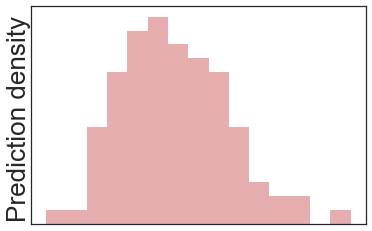

In [117]:
final_vals = []
for i in y_predictions:
    final_val = i[-1]
    final_vals.append(final_val)

fig, ax = plt.subplots()
ax.hist(final_vals, bins=15, density=True, alpha=0.5,
         histtype='stepfilled', color='indianred',
         edgecolor='none')

plt.xticks([])
plt.yticks([])
ax.invert_xaxis()

# plt.text(.9, 1, cohort + ' prediction density', rotation = 90, size = 14)
fig.text(.07, .15, 'Prediction density', rotation = 90, size = 26)
plt.savefig('./C/'+cohort+'_size_distr.png')

In [ ]:
# Partial cohorts

In [155]:
full_responseX = [('ACC',0)]

In [151]:
partial_response_predict = [('ACC', 0),
                        ('CESC', 3),
                        ('ESCC', 5),
                        ('KIRP', 9),
                        ('MESO', 14),
                        ('PAAD', 16),
                        ('PCPG', 17),
                        ('SARC', 19),
                        ('TGCT', 21),
                        ('THYM', 23),
                        ('UVM', 25),]

('ACC', 0)
done


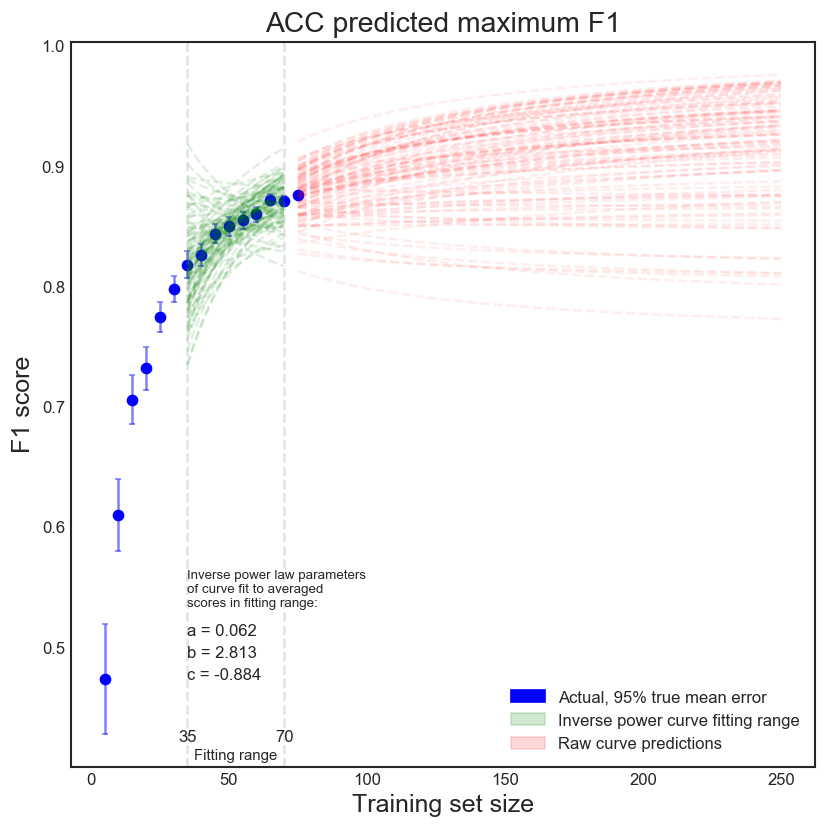

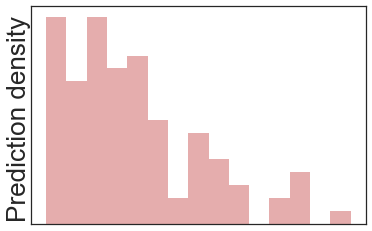

In [156]:
# Partial cohorts, template from above

for idx, cohort_tuple in enumerate(full_responseX): # list of cohorts and indices <--- TOGGLE object, COAD, LUAD
    
    print(cohort_tuple)
    cohort = cohort_tuple[0]
    cohort_index = cohort_tuple[1]

    accuracy_response_dct = {
    int(k):[i for i in v] for k,v in json.loads(
        sample_response_DF.iloc[cohort_index,1]).items()} # sample_response_DF_20210805.tsv
    
    accuracy_response = sorted(accuracy_response_dct.items())
    
    # List of full sample sizes and scores
    full_samples = []
    full_scores = []
    for i in list(range(0,len(accuracy_response))):
        score = mean(accuracy_response[i][1])
        mean_temp = round(score, 3)
        full_scores.append(mean_temp)
        full_samples.append(accuracy_response[i][0])

    # Plot learning curve
    fig, ax = plt.subplots(figsize = (8,8), dpi = 120)
    ax.scatter(full_samples, full_scores, color = 'blue')
    
    # Set fitting region by index
    if cohort not in ['COADREAD', 'HNSC']:
        sample_max = 14 #14 is default, max
        sample_min = 6 #5 is default # BRCA 14,4 and 13,4 is good, 14,7 too
    else:
        sample_max = 13 # 13 is default, max
        sample_min = 5  # 4 is dfault      

    fitting_samples = []
    fitting_scores = []
    fitting_scores_ave = []
    for i in list(range(sample_min, sample_max)):
        score_block = accuracy_response[i][1]
        sample_size = accuracy_response[i][0]
        fitting_samples.append(sample_size)
        fitting_scores.append(score_block) # raw scores for this step
        fitting_scores_ave.append(mean(score_block))

    actual_scores = []
    prediction_samples = [75,80,85,90,95,100,
                     110,120,130,140,150,160,170,180,
                     190,200,210,220,230,240,250]

    actual_full_scores = []
    for j in list(range(0,len(accuracy_response))):
        actual_full_scores.append(accuracy_response[j][1])
    
    n1 = 100
    CI_range = []
    for k, score_set in enumerate(actual_full_scores):
#         xbar = round(mean(score_set), 3) # yes
        z = 1.96 # 95%
        s = statistics.stdev(score_set) # Yes, all the scores corresponding to this step
        CI_range.append(z * (s/math.sqrt(n1)))
    # Errorbars for sampling error, Keep, bring to top
    ax.errorbar(full_samples,
                full_scores,
                yerr = CI_range, color = 'blue', alpha = .5, fmt=' ',
                capsize = 2)
    
    slope = ()
    front_end_mean_params, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 fitting_scores_ave,
                                    bounds=[lower,upper])
    x_fit_slope = np.linspace(fitting_samples[0], fitting_samples[-1], len(fitting_samples))
    y_fit_slope = Y_acc(x_fit_slope, *front_end_mean_params)
#     ax.scatter(x_fit_slope, y_fit_slope, s=60, facecolors='none', edgecolors='black')
    
    parameter_dict[cohort_index] = front_end_mean_params # add to parameter dict
    
    slope_ave = (y_fit_slope[-1] - y_fit_slope[0])/(x_fit_slope[-1] - x_fit_slope[0])
    slope_list.append(slope_ave)
    
    intercept_ave = y_fit_slope[0] - slope_ave * x_fit_slope[0]
    intercept_list.append(intercept_ave)
    
    # Grey dot projection, based on average curve
    project = Y_acc(prediction_samples, *front_end_mean_params)
#    ax.scatter(prediction_samples, project, s=50, facecolors='none', edgecolors='grey') ## <--- Grey dots off
    
    # Grey dot confidence interval - only one sample for n
    grey_up = []
    grey_low = []
    n=1

    # Set up for prediction              *********************** 100 resamplings, build orange bar
    front_end_parameters = {}
    y_predictions = []         #                             <---------- y_predictions
    y_predictions_srs = pd.Series(dtype = 'float64')
    y_std = []
    slopes_100 = []
    intercepts_100 = []
    y_final_100 = []
    orange_vs_grey = []
    down_curves = []
    down_curves_srs = pd.Series(dtype = 'float64')
    for resampling_idx in list(range(0,100)):

        scores_temp = [] # 100 scores for each sample size on restricted front-end portion of curve

        for tuple_n in accuracy_response[sample_min:sample_max]:
            scores_temp.append(tuple_n[1][resampling_idx])

        front_end_param_set_n, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 scores_temp,
                                    bounds=[lower,upper])
        front_end_parameters[resampling_idx] = front_end_param_set_n

        # Now, plot all 100 front-end fitting curves and compare to actual 
        x_fit = np.linspace(fitting_samples[0], fitting_samples[-1], 50)
        y_fit = Y_acc(x_fit, *front_end_param_set_n)
        ax.plot(x_fit, y_fit, '--', color = 'green', alpha = .12)
        
        slope = (y_fit[-1] - y_fit[0])/(x_fit[-1] - x_fit[0])
        slopes_100.append(slope)
        intercept = y_fit[0] - slope * x_fit[0]
        intercepts_100.append(intercept)
        
        y_predict = Y_acc(prediction_samples, *front_end_param_set_n) # DEBUG trace back
        ax.plot(prediction_samples, y_predict, '--', color = 'red', alpha = .07)
        y_predictions.append(y_predict)
        
        y_predictions_srs[str(resampling_idx)] = y_predict

        y_final_100.append(y_predict[-1])
        
        diff = y_predict[0]-y_predict[-1]
        down_curves.append(diff)
    
    slopeDF_100 = pd.DataFrame()
    slopeDF_100['Intercept'] = intercepts_100
    slopeDF_100['Slope'] = slopes_100

    # Label plot, keep
    plt.title(cohort +
        ' predicted maximum F1',
        fontsize = 17)
    ax.set_xlabel('Training set size', fontsize = 15)
    ax.set_ylabel('F1 score', fontsize = 15)
    
    # Tune placement of labels, keep
    xfit1 = fitting_samples[0]
    xfit2 = fitting_samples[-1]
    ylims = ax.get_ylim()
    y_rng = ylims[1] - ylims[0]              # Y range, defined from limits
    
    # Fitting range labels
    plt.text(xfit1, ylims[0]+.035 * y_rng,
             str(xfit1), ha = 'center')    
    plt.text((xfit1+xfit2)/2, ylims[0]+.01 * y_rng,
             'Fitting range', ha = 'center', fontsize = 9)
    plt.text(xfit2, ylims[0]+.035 * y_rng,
             str(xfit2), ha = 'center')
    
    # Add vertical dashes for fitting window, keep
    ax.add_artist(lines.Line2D([xfit1, xfit1],
                              [ylims[0], ylims[1]],
                              color = 'grey', linestyle='dashed', alpha = .22))
    ax.add_artist(lines.Line2D([xfit2, xfit2],
                              [ylims[0], ylims[1]],
                              color = 'grey', linestyle='dashed', alpha = .22))
    
    patch_1 = mpatches.Patch(color='blue', label='Actual, 95% true mean error') # delete
    patch_2 = mpatches.Patch(color='green', alpha = .18, label='Inverse power curve fitting range')
    patch_3 = mpatches.Patch(color='red', alpha = .15, label='Raw curve predictions')
    plt.legend(handles=[patch_1, patch_2, patch_3], loc = 4)
    
    # Plot parameters
    plt.text(xfit1, ylims[0]+.22 * y_rng, 'Inverse power law parameters\nof curve fit to averaged\nscores in fitting range:',
            fontsize = 8)
    plt.text(xfit1, ylims[0]+.18 * y_rng, 'a = '+str(round(front_end_mean_params[0],3)))
    plt.text(xfit1, ylims[0]+.15 * y_rng, 'b = '+str(round(front_end_mean_params[1],3)))         
    plt.text(xfit1, ylims[0]+.12 * y_rng, 'c = '+str(round(front_end_mean_params[2],3)))

    # Save figure, keep
    plt.savefig('./D/'+ cohort + '.'+
                str(fitting_samples[0])+'.'+
                str(fitting_samples[-1])+
                '.png') # end devel mode
    
    # Density of partial cohort
    final_vals = []
    for i in y_predictions:
        final_val = i[-1]
        final_vals.append(final_val)

    fig, ax = plt.subplots()
    ax.hist(final_vals, bins=15, density=True, alpha=0.5,
             histtype='stepfilled', color='indianred',
             edgecolor='none')

    plt.xticks([])
    plt.yticks([])
    ax.invert_xaxis()

    # plt.text(.9, 1, cohort + ' prediction density', rotation = 90, size = 14)
    fig.text(.07, .15, 'Prediction density', rotation = 90, size = 26)
    plt.savefig('./D/'+cohort+'_size_distr.png')

print('done')



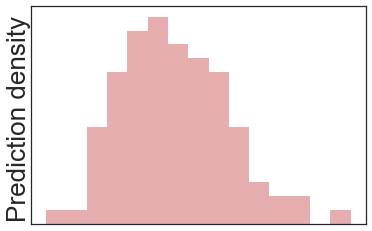

In [131]:
final_vals = []
for i in y_predictions:
    final_val = i[-1]
    final_vals.append(final_val)

fig, ax = plt.subplots()
ax.hist(final_vals, bins=15, density=True, alpha=0.5,
         histtype='stepfilled', color='indianred',
         edgecolor='none')

plt.xticks([])
plt.yticks([])
ax.invert_xaxis()

# plt.text(.9, 1, cohort + ' prediction density', rotation = 90, size = 14)
fig.text(.07, .15, 'Prediction density', rotation = 90, size = 26)
plt.savefig('./C/'+cohort+'_size_distr.png')